**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

**Import Accessibility**

In [2]:
txt_fdiry = file.path(
    FD_RES,
    "region_coverage_fcc",
    "fcc_astarr_macs_input_overlap", 
    "STARR_ATAC_K562_Reddy_KS91",
    "overlap_score",
    "summary"
)

txt_fname = "result.coverage.TPM.FPKM.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_astarr = dat
print(dim(dat))
head(dat)

[1] 150041      8


Chrom,ChromStart,ChromEnd,Region,Input_FPKM,Input_TPM,Output_FPKM,Output_TPM
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,chr1:10038-10405,0.004164383,3.940038,0.0007357323,0.7181993
chr1,14282,14614,chr1:14282-14614,0.003003325,2.841707,0.0022620843,2.2104314
chr1,16025,16338,chr1:16025-16338,0.004048701,3.830812,0.0012867327,1.2597204
chr1,17288,17689,chr1:17288-17689,0.006551198,6.198372,0.0017372529,1.7059186
chr1,28934,29499,chr1:28934-29499,0.004295316,4.064322,0.0006561996,0.6447721
chr1,115429,115969,chr1:115429-115969,0.015954822,15.096518,0.0282829448,27.6549997


**Import GC content**

In [7]:
txt_fdiry = file.path(
    FD_RES,
    "region_nuc",
    "fcc_astarr_macs"
)

txt_fname = "K562.hg38.ASTARR.macs.KS91.input.rep_all.max_overlaps.q5.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat = dat %>% dplyr::select(
    `#1_usercol`,
    `2_usercol`,
    `3_usercol`,
    `5_pct_gc`,
    `12_seq_len`
)
colnames(dat) = c("Chrom", "ChromStart", "ChromEnd", "GC", "Length")

dat = dat %>% dplyr::mutate(Region = fun_gen_region(Chrom, ChromStart, ChromEnd)) 

dat_region_pgc = dat
print(dim(dat))
head(dat)

[1] 150042      6


Chrom,ChromStart,ChromEnd,GC,Length,Region
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr1,10038,10405,0.523161,367,chr1:10038-10405
chr1,14282,14614,0.578313,332,chr1:14282-14614
chr1,16025,16338,0.587859,313,chr1:16025-16338
chr1,17288,17689,0.625935,401,chr1:17288-17689
chr1,28934,29499,0.771681,565,chr1:28934-29499
chr1,115429,115969,0.381481,540,chr1:115429-115969


**Import annotation matrix**

In [5]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
#txt_fname = "matrix.annotation.merge.chipseq_full.fcc.tss.tsv"
txt_fname = "matrix.annotation.prepare.full.chipseq_full.only.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

mat_region_annot = dat
print(dim(dat))
head(dat)

[1] 139130    526


Region,ADNP,AFF1,AGO1,ARHGAP35,ARID1B,ARID2,ARID3A,ARID3B,ARID4B,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:16025-16338,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:137748-138049,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:138321-139517,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:186343-187136,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:605104-605675,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:778233-779389,0,1,1,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,1,0,0


## Distribution

Warning message:
“Removed 13 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


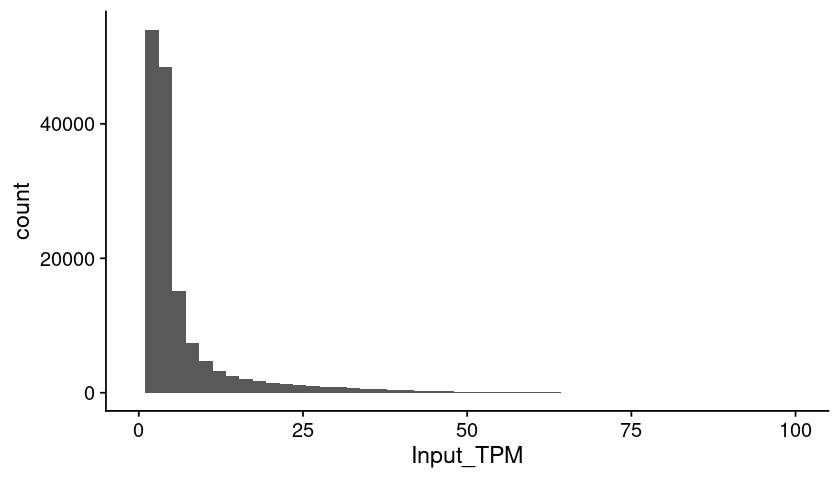

In [148]:
dat = dat_region_astarr 
gpt = ggplot(dat, aes(x=Input_TPM)) +
    geom_histogram(bins = 50) +
    xlim(0, 100) +
    theme_cowplot()

options(repr.plot.height = 4, repr.plot.width = 7)
print(gpt)

In [28]:
dat = dplyr::inner_join(
    dat_region_pgc,
    dat_region_astarr,
    by = c("Chrom", "ChromStart", "ChromEnd", "Region")
)

dat_region_test = dat
print(dim(dat))
head(dat)

[1] 150041     10


Chrom,ChromStart,ChromEnd,pGC,Length,Region,Input_FPKM,Input_TPM,Output_FPKM,Output_TPM
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,0.523161,367,chr1:10038-10405,0.004164383,3.940038,0.0007357323,0.7181993
chr1,14282,14614,0.578313,332,chr1:14282-14614,0.003003325,2.841707,0.0022620843,2.2104314
chr1,16025,16338,0.587859,313,chr1:16025-16338,0.004048701,3.830812,0.0012867327,1.2597204
chr1,17288,17689,0.625935,401,chr1:17288-17689,0.006551198,6.198372,0.0017372529,1.7059186
chr1,28934,29499,0.771681,565,chr1:28934-29499,0.004295316,4.064322,0.0006561996,0.6447721
chr1,115429,115969,0.381481,540,chr1:115429-115969,0.015954822,15.096518,0.0282829448,27.6549997


In [45]:
dat = dat_region_test
dat = dat %>%
    dplyr::mutate(
        pLog10_Signal = log10(Input_TPM + 1),
        pLog10_Length = log10(Length + 1),
        pLog10_GC     = log10(GC + 1)
    )

vec = c("Input_TPM", "pGC", "Length", "pLog10_Signal", "pLog10_Length", "pLog10_GC")
dat = dat %>%
    tidyr::pivot_longer(
        cols      = any_of(vec),
        names_to  = "features",
        values_to = "values")

head(dat, 3)

Chrom,ChromStart,ChromEnd,Region,Input_FPKM,Output_FPKM,Output_TPM,features,values
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
chr1,10038,10405,chr1:10038-10405,0.004164383,0.0007357323,0.7181993,Input_TPM,3.940038
chr1,10038,10405,chr1:10038-10405,0.004164383,0.0007357323,0.7181993,pGC,0.523161
chr1,10038,10405,chr1:10038-10405,0.004164383,0.0007357323,0.7181993,Length,367.000000


In [46]:
lst = split(dat$values, dat$features)
lst = lapply(lst, summary)
lst[vec]

$Input_TPM
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0019   2.7417   3.6286   6.6648   6.2424 473.2625 

$pGC
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2771  0.4651  0.5204  0.5269  0.5843  1.0000 

$Length
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   401.0   597.0   712.8   909.0  6172.0 

$pLog10_Signal
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0008313 0.5730688 0.6654455 0.7656378 0.8598817 2.6760188 

$pLog10_Length
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.301   2.604   2.777   2.786   2.959   3.790 

$pLog10_GC
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1062  0.1659  0.1820  0.1832  0.1998  0.3010 


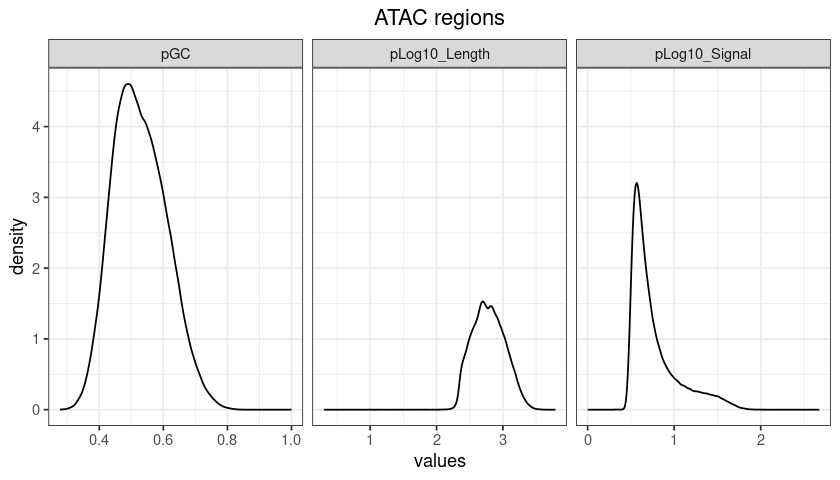

In [50]:
vec = c("pLog10_Signal", "pLog10_Length", "pGC")
tmp = dat %>% dplyr::filter(features %in% vec)

gpt = ggplot(tmp, aes(x=values)) +
    
    stat_density(geom='line', position='identity') +
    ggtitle("ATAC regions") +
    facet_wrap(~features, scales = "free_x") +
    theme_bw() +
    theme(plot.title=element_text(hjust=0.5))

options(repr.plot.height = 4, repr.plot.width = 7)
print(gpt)

## Merge

In [198]:
dat = dplyr::inner_join(
    dat_region_pgc,
    dat_region_astarr,
    by = c("Chrom", "ChromStart", "ChromEnd", "Region")
)
dat = dat %>%
    dplyr::mutate(
        pLog10_Signal = log10(Input_TPM + 1),
        pLog10_Length = log10(Length + 1),
        pLog10_GC     = log10(pGC + 1),
    )

dat = dat %>% dplyr::left_join(
    mat_region_annot,
    by = c("Chrom", "ChromStart", "ChromEnd", "Region")
)
dat = dat %>% replace(is.na(.), 0)

dat_region_merge = dat
print(dim(dat))
head(dat)

[1] 150041    549


Chrom,ChromStart,ChromEnd,pGC,Length,Region,Input_FPKM,Input_TPM,Output_FPKM,Output_TPM,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,0.523161,367,chr1:10038-10405,0.004164383,3.940038,0.0007357323,0.7181993,⋯,0,0,0,0,0,0,0,0,0,0
chr1,14282,14614,0.578313,332,chr1:14282-14614,0.003003325,2.841707,0.0022620843,2.2104314,⋯,0,0,0,0,0,0,0,0,0,0
chr1,16025,16338,0.587859,313,chr1:16025-16338,0.004048701,3.830812,0.0012867327,1.2597204,⋯,0,0,0,0,0,0,0,0,0,0
chr1,17288,17689,0.625935,401,chr1:17288-17689,0.006551198,6.198372,0.0017372529,1.7059186,⋯,0,0,0,0,0,0,0,0,0,0
chr1,28934,29499,0.771681,565,chr1:28934-29499,0.004295316,4.064322,0.0006561996,0.6447721,⋯,0,0,0,0,0,0,0,0,0,0
chr1,115429,115969,0.381481,540,chr1:115429-115969,0.015954822,15.096518,0.0282829448,27.6549997,⋯,0,0,0,0,0,0,0,1,0,0
